In [3]:
import gym
import highway_env

env = gym.make('ma-highway-v0')
env.reset()
space = env.step(1)
print(space)


AttributeError: 'super' object has no attribute '_create_vehicles'

In [28]:
obs_space = env.observation_space
action_space = env.action_space
print("The observation space: {}".format(obs_space))
print("The action space: {}".format(action_space))


The observation space: Box(-inf, inf, (5, 5), float32)
The action space: Discrete(5)


In [29]:
from pprint import pprint as pp

pp(env.observation_space.sample())

array([[-1.8316482 ,  0.79147464, -0.5001454 ,  0.52025443, -1.3727971 ],
       [ 0.9134619 ,  0.59995186,  1.4439294 ,  0.5789004 , -0.29532754],
       [-0.96325564, -0.5336416 , -1.9501513 , -0.7224508 , -0.01410022],
       [-0.5878766 , -1.1747849 ,  0.69301105,  1.432511  , -0.61199236],
       [-0.05409706, -0.71666527, -0.24373984,  1.6519818 ,  1.1233865 ]],
      dtype=float32)


In [36]:
#this is the initial observation
sample = env.reset()
pp(sample)

array([[ 1.        ,  0.7588292 ,  0.        ,  0.3125    ,  0.        ],
       [ 1.        ,  0.1154908 ,  0.        , -0.04536166,  0.        ],
       [ 1.        ,  0.23868461,  0.6666667 , -0.03553975,  0.        ],
       [ 1.        ,  0.34552154,  0.6666667 , -0.04619421,  0.        ],
       [ 1.        ,  0.4678683 ,  0.        , -0.01675056,  0.        ]],
      dtype=float32)


In [61]:
#sample action
env.reset()
random_action = env.action_space.sample()

a = env.step(random_action)
print(a)
pp("with action {}, the new observation is {}".format(random_action, new_obs))

(array([[ 1.        ,  0.88071537,  0.36166957,  0.31220847, -0.01349542],
       [ 1.        ,  0.09389804, -0.02833624, -0.04274309,  0.01349542],
       [ 1.        ,  0.1865528 ,  0.3049971 , -0.08982538,  0.01349542],
       [ 1.        ,  0.32322744,  0.3049971 , -0.03833811,  0.01349542],
       [ 1.        ,  0.42973354, -0.21210049, -0.1041224 , -0.02453525]],
      dtype=float32), 0.8327113850086175, False, {'speed': 25.0, 'crashed': False, 'action': 0, 'rewards': {'collision_reward': 0.0, 'right_lane_reward': 0.5, 'high_speed_reward': 0.49766769378231535, 'on_road_reward': 1.0}})
('with action 0, the new observation is [[ 1.          0.90934336  0.          '
 '0.36676955  0.        ]\n'
 ' [ 1.          0.0941318   0.42175415 -0.15296537 -0.01711713]\n'
 ' [ 1.          0.20479366  0.5651698  -0.12837435  0.0413366 ]\n'
 ' [ 1.          0.34625244  0.         -0.08894892  0.        ]\n'
 ' [ 1.          0.44508848  0.60046256 -0.16012754  0.0269115 ]]')


c:\Users\IoTLab\anaconda3\envs\HighwayEnv\lib\site-packages\gym\utils\passive_env_checker.py:298: UserWarning: WARN: No render fps was declared in the environment (env.metadata['render_fps'] is None or not defined), rendering may occur at inconsistent fps.
  "No render fps was declared in the environment (env.metadata['render_fps'] is None or not defined), rendering may occur at inconsistent fps."


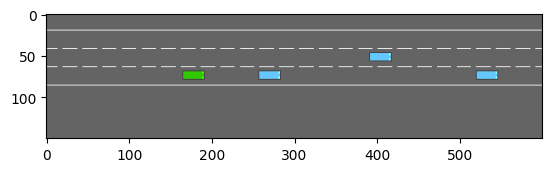

In [32]:
import matplotlib.pyplot as plt 

env_screen = env.render(mode = 'rgb_array')
env.close()
plt.imshow(env_screen)

In [34]:
env.configure({'simulation_frequency':30, 'show_trajectories':True, 'initial_lane_id':2, 'duration':5, 'vehicles_density':2, 'ego_spacing':1})


for trials in range(10):
        done = False
        obs = env.reset()
        while not done:
            # Predict
            random_action = env.action_space.sample()
            # Get reward
            obs, reward, done, info = env.step(random_action)
            print(reward)
            # Render
            env.render()
env.close()

0.9759988956651501


c:\Users\IoTLab\anaconda3\envs\HighwayEnv\lib\site-packages\gym\core.py:58: DeprecationWarning: WARN: You are calling render method, but you didn't specified the argument render_mode at environment initialization. To maintain backward compatibility, the environment will render in human mode.
If you want to render in human mode, initialize the environment in this way: gym.make('EnvName', render_mode='human') and don't call the render method.
See here for more information: https://www.gymlibrary.ml/content/api/
  "You are calling render method, "
c:\Users\IoTLab\anaconda3\envs\HighwayEnv\lib\site-packages\gym\core.py:52: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  "The argument mode in render method is deprecated; "


0.10179058417586188
0.7573344376681832
0.7376537309030259
0.06666666666666665
0.831663889358251
0.9426530536222587
0.06666666666666665
0.9759988956651501
0.9956796024303074
0.06666666666666665
0.9759988956651501
0.06107013303332957
0.8666666666666667
0.06666666666666665
0.831663889358251
0.03333333333333336
0.7573344376681832
0.7376537309030259
0.7000000000000001
0.809449782563474
0.10483398007390014
0.7573344376681832
0.7376537309030259
0.7341110406796201
0.03333333333333336
0.831663889358251
0.03333333333333336
